# 1. Import Libraries and Load Datasets

In [8]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load the datasets
customers_df = pd.read_csv('Customers.csv', encoding='utf-8-sig')
products_df = pd.read_csv('Products.csv', encoding='utf-8-sig')
transactions_df = pd.read_csv('Transactions.csv', encoding='utf-8-sig')

# Display the first few rows of each dataset
print("Customers Dataset:")
print(customers_df.head(), "\n")

Customers Dataset:
  CustomerID        CustomerName         Region  SignupDate
0      C0001    Lawrence Carroll  South America  2022-07-10
1      C0002      Elizabeth Lutz           Asia  2022-02-13
2      C0003      Michael Rivera  South America  2024-03-07
3      C0004  Kathleen Rodriguez  South America  2022-10-09
4      C0005         Laura Weber           Asia  2022-08-15 



In [9]:
print("Products Dataset:")
print(products_df.head(), "\n")

Products Dataset:
  ProductID              ProductName     Category   Price
0      P001     ActiveWear Biography        Books  169.30
1      P002    ActiveWear Smartwatch  Electronics  346.30
2      P003  ComfortLiving Biography        Books   44.12
3      P004            BookWorld Rug   Home Decor   95.69
4      P005          TechPro T-Shirt     Clothing  429.31 



In [10]:
print("Transactions Dataset:")
print(transactions_df.head())

Transactions Dataset:
  TransactionID CustomerID ProductID      TransactionDate  Quantity   
0        T00001      C0199      P067  2024-08-25 12:38:23         1  \
1        T00112      C0146      P067  2024-05-27 22:23:54         1   
2        T00166      C0127      P067  2024-04-25 07:38:55         1   
3        T00272      C0087      P067  2024-03-26 22:55:37         2   
4        T00363      C0070      P067  2024-03-21 15:10:10         3   

   TotalValue   Price  
0      300.68  300.68  
1      300.68  300.68  
2      300.68  300.68  
3      601.36  300.68  
4      902.04  300.68  


# 2. Analyze Customers Dataset

In [11]:
# Convert 'SignupDate' to datetime format
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])

In [12]:
# Basic Information
print("\nCustomers Dataset Info:")
customers_df.info()


Customers Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB


In [13]:
# Check for Missing Values
print("\nMissing Values in Customers Dataset:")
print(customers_df.isnull().sum())


Missing Values in Customers Dataset:
CustomerID      0
CustomerName    0
Region          0
SignupDate      0
dtype: int64


In [14]:
# Summary Statistics
print("\nSummary Statistics for Customers Dataset:")
print(customers_df.describe(include='all'))


Summary Statistics for Customers Dataset:
       CustomerID      CustomerName         Region           SignupDate
count         200               200            200                  200
unique        200               200              4                  NaN
top         C0001  Lawrence Carroll  South America                  NaN
freq            1                 1             59                  NaN
mean          NaN               NaN            NaN  2023-07-19 08:31:12
min           NaN               NaN            NaN  2022-01-22 00:00:00
25%           NaN               NaN            NaN  2022-09-26 12:00:00
50%           NaN               NaN            NaN  2023-08-31 12:00:00
75%           NaN               NaN            NaN  2024-04-12 12:00:00
max           NaN               NaN            NaN  2024-12-28 00:00:00


In [15]:
# Count of customers by region
region_counts = customers_df['Region'].value_counts()
region_counts

Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64

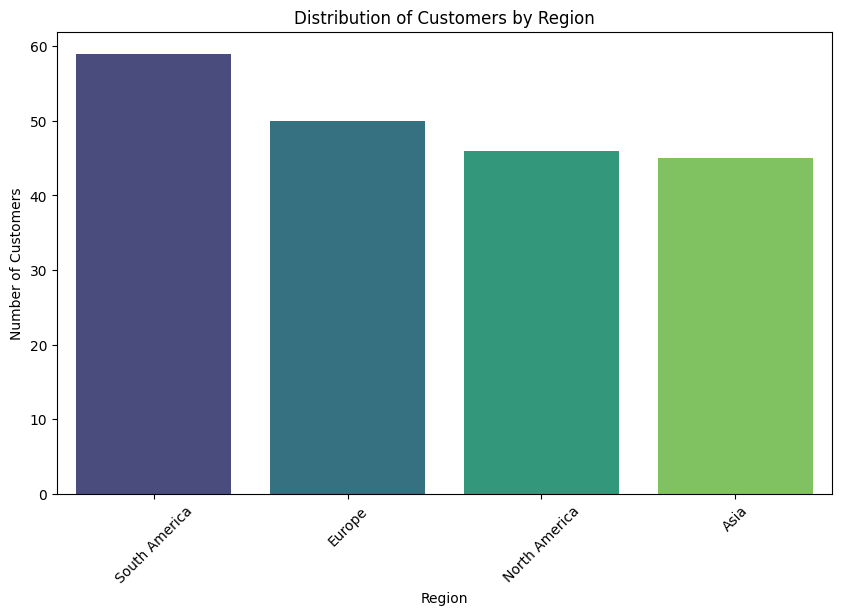

In [16]:
# Distribution of Customers by Region
region_counts = customers_df['Region'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=customers_df, x='Region', order=region_counts.index, palette='viridis')
plt.title('Distribution of Customers by Region')
plt.xlabel('Region')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.show()


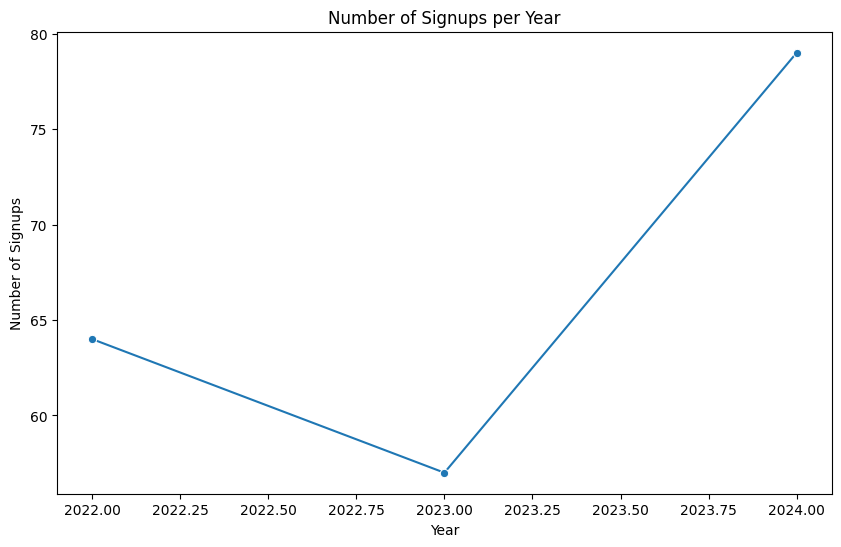

In [17]:
# Extract year from 'SignupDate' for trend analysis
customers_df['SignupYear'] = customers_df['SignupDate'].dt.year

# Number of Signups per Year
signup_year_counts = customers_df['SignupYear'].value_counts().sort_index()
plt.figure(figsize=(10, 6))
sns.lineplot(data=signup_year_counts, marker='o')
plt.title('Number of Signups per Year')
plt.xlabel('Year')
plt.ylabel('Number of Signups')
plt.show()

# Business Insights from the EDA

1. Customer Distribution by Region:
    - South America has the highest number of customers, followed by Europe, North America, and Asia.
    - This suggests a potential focus on marketing and customer engagement strategies in South America to maintain and grow  the customer base.

2. Customer Signups Over Time:
    - The number of customer signups has been increasing over the years, with the highest number of signups in 2024.
    - This trend indicates a growing interest in the company's offerings, suggesting that the business strategies are effective.
    
3. Data Completeness:
    - The dataset is complete with no missing values, which is excellent for analysis and decision-making.

4. Unique Customer IDs and Names:
    - Each customer has a unique ID and name, ensuring that there are no duplicates in the dataset.
    
# Recommendations
    - Focus on South America: Given the high number of customers, consider enhancing services or introducing new products tailored to this region.
    - Leverage Growth Trends: With increasing signups, continue to invest in marketing and customer acquisition strategies to sustain growth.
    - Explore Underrepresented Regions: Consider strategies to increase customer base in regions like Asia and North America.

# 3. Analyze Products Dataset

In [18]:
# Basic Information
print("\nProducts Dataset Info:")
products_df.info()


Products Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.2+ KB


In [19]:
# Check for Missing Values
print("\nMissing Values in Products Dataset:")
print(products_df.isnull().sum())


Missing Values in Products Dataset:
ProductID      0
ProductName    0
Category       0
Price          0
dtype: int64


In [20]:
# Summary Statistics
print("\nSummary Statistics for Products Dataset:")
print(products_df.describe(include='all'))


Summary Statistics for Products Dataset:
       ProductID            ProductName Category       Price
count        100                    100      100  100.000000
unique       100                     66        4         NaN
top         P001  ActiveWear Smartwatch    Books         NaN
freq           1                      4       26         NaN
mean         NaN                    NaN      NaN  267.551700
std          NaN                    NaN      NaN  143.219383
min          NaN                    NaN      NaN   16.080000
25%          NaN                    NaN      NaN  147.767500
50%          NaN                    NaN      NaN  292.875000
75%          NaN                    NaN      NaN  397.090000
max          NaN                    NaN      NaN  497.760000


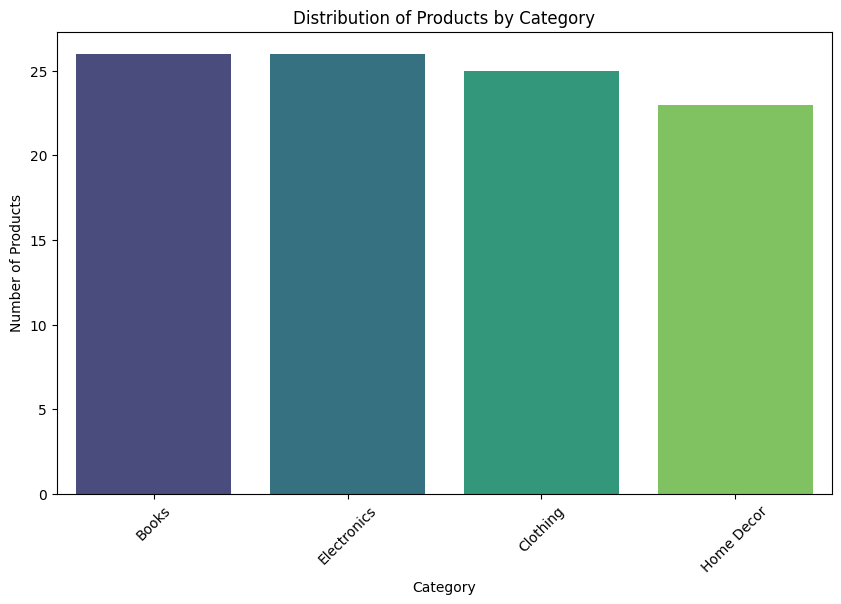

In [21]:
# Distribution of Products by Category
category_counts = products_df['Category'].value_counts()
plt.figure(figsize=(10, 6))
sns.countplot(data=products_df, x='Category', order=category_counts.index, palette='viridis')
plt.title('Distribution of Products by Category')
plt.xlabel('Category')
plt.ylabel('Number of Products')
plt.xticks(rotation=45)
plt.show()

# Business Insights from the EDA
1. Product Distribution by Category:
    - The products are fairly evenly distributed across the four categories: Books, Electronics, Clothing, and Home Decor.
    - Books and Electronics have the highest number of products, suggesting a focus on these categories.
    
2. Price Analysis:
    - The average price of products is approximately 267.55 with a standard deviation of 143.22
    - The price range is from 16.08 to 497.76 indicating a wide variety of products catering to different budget levels.

3. Data Completeness:
    - The dataset is complete with no missing values, which is excellent for analysis and decision-making.

4. Unique Product IDs and Names:
    - Each product has a unique ID and name, ensuring that there are no duplicates in the dataset.
    
# Recommendations
    - Focus on Popular Categories: Given the high number of products in Books and Electronics, consider enhancing offerings or introducing new products in these categories.
    - Price Strategy: With a wide price range, ensure that marketing strategies highlight both budget-friendly and premium products to attract a diverse customer base.
    - Explore Underrepresented Categories: Consider strategies to increase product offerings in Home Decor and Clothing.

# 4. Analyze Transactions Dataset

In [22]:
# Convert 'TransactionDate' to datetime format
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

In [23]:
# Extract year and month for trend analysis
transactions_df['Year'] = transactions_df['TransactionDate'].dt.year
transactions_df['Month'] = transactions_df['TransactionDate'].dt.month

In [24]:
# Basic Information
print("\nTransactions Dataset Info:")
transactions_df.info()



Transactions Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   TransactionID    1000 non-null   object        
 1   CustomerID       1000 non-null   object        
 2   ProductID        1000 non-null   object        
 3   TransactionDate  1000 non-null   datetime64[ns]
 4   Quantity         1000 non-null   int64         
 5   TotalValue       1000 non-null   float64       
 6   Price            1000 non-null   float64       
 7   Year             1000 non-null   int32         
 8   Month            1000 non-null   int32         
dtypes: datetime64[ns](1), float64(2), int32(2), int64(1), object(3)
memory usage: 62.6+ KB


In [25]:
# Check for Missing Values
print("\nMissing Values in Transactions Dataset:")
print(transactions_df.isnull().sum())


Missing Values in Transactions Dataset:
TransactionID      0
CustomerID         0
ProductID          0
TransactionDate    0
Quantity           0
TotalValue         0
Price              0
Year               0
Month              0
dtype: int64


## Data Overview:
    - The dataset contains 1000 entries and 7 columns.
    - Columns include TransactionID, CustomerID, ProductID, TransactionDate, Quantity, TotalValue, and Price.
    - All columns have complete data with no missing values.
    
## Data Types:
    - TransactionID, CustomerID, and ProductID are categorical variables.
    - TransactionDate is a datetime object but currently stored as a string.
    - Quantity is an integer, while TotalValue and Price are float values.
    
## Descriptive Statistics:
    - The dataset provides information on the quantity and value of transactions.
    - We can explore the distribution of Quantity, TotalValue, and Price to understand sales patterns.
    
## Time Series Analysis:
    - We can analyze transactions over time to identify trends and patterns.
    - Customer and Product Analysis:
    - Analyze the number of unique customers and products to understand the diversity of the dataset.

In [26]:
# Summary Statistics
print("\nSummary Statistics for Transactions Dataset:")
print(transactions_df.describe())


Summary Statistics for Transactions Dataset:
                     TransactionDate     Quantity   TotalValue       Price   
count                           1000  1000.000000  1000.000000  1000.00000  \
mean   2024-06-23 15:33:02.768999936     2.537000   689.995560   272.55407   
min              2023-12-30 15:29:12     1.000000    16.080000    16.08000   
25%       2024-03-25 22:05:34.500000     2.000000   295.295000   147.95000   
50%       2024-06-26 17:21:52.500000     3.000000   588.880000   299.93000   
75%              2024-09-19 14:19:57     4.000000  1011.660000   404.40000   
max              2024-12-28 11:00:00     4.000000  1991.040000   497.76000   
std                              NaN     1.117981   493.144478   140.73639   

              Year        Month  
count  1000.000000  1000.000000  
mean   2023.996000     6.288000  
min    2023.000000     1.000000  
25%    2024.000000     3.000000  
50%    2024.000000     6.000000  
75%    2024.000000     9.000000  
max    2024.0

# Key Insights from Descriptive Statistics
## Transaction Quantity:
    - The average quantity per transaction is approximately 2.54.
    - The quantity ranges from 1 to 4, indicating that customers typically purchase a small number of items per transaction.
    
    
## Total Value and Price:
    - The average total value of transactions is 689.99
    - The average price of products is 272.55

    - TransactionDate is a datetime object but currently stored as a string.
    - Quantity is an integer, while TotalValue and Price are float values.
    
## Time Analysis:
    - The transactions span from late 2023 to late 2024.
    - The dataset covers all months, with a mean month of approximately June.
    

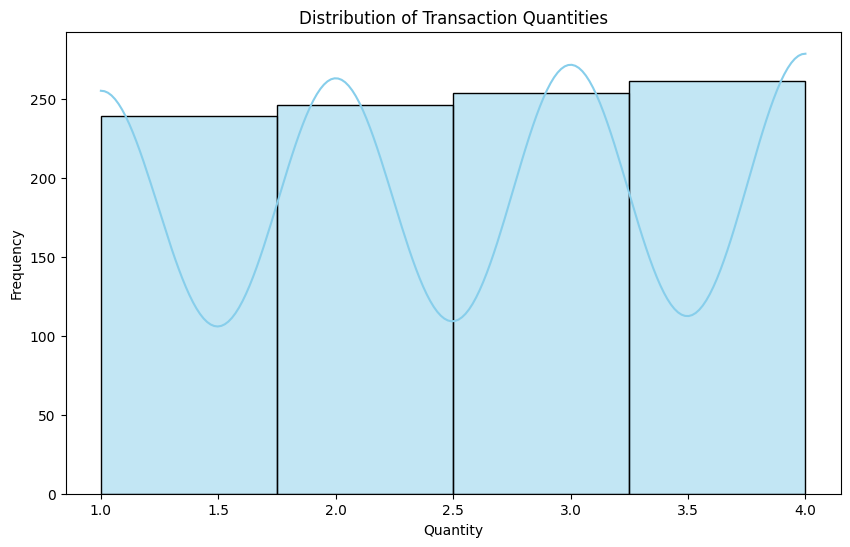

In [27]:
# Distribution of Transaction Quantities
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['Quantity'], bins=4, kde=True, color='skyblue')
plt.title('Distribution of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.show()

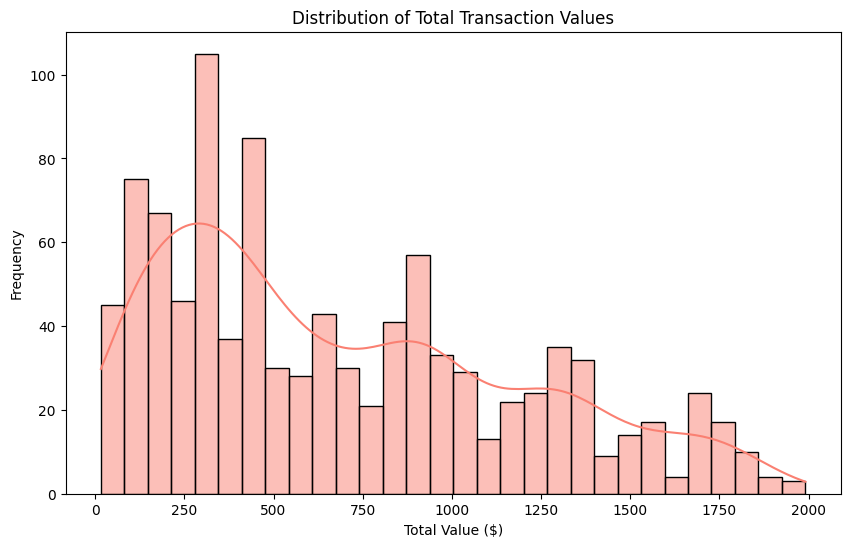

In [28]:
# Distribution of Total Transaction Values
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['TotalValue'], bins=30, kde=True, color='salmon')
plt.title('Distribution of Total Transaction Values')
plt.xlabel('Total Value ($)')
plt.ylabel('Frequency')
plt.show()

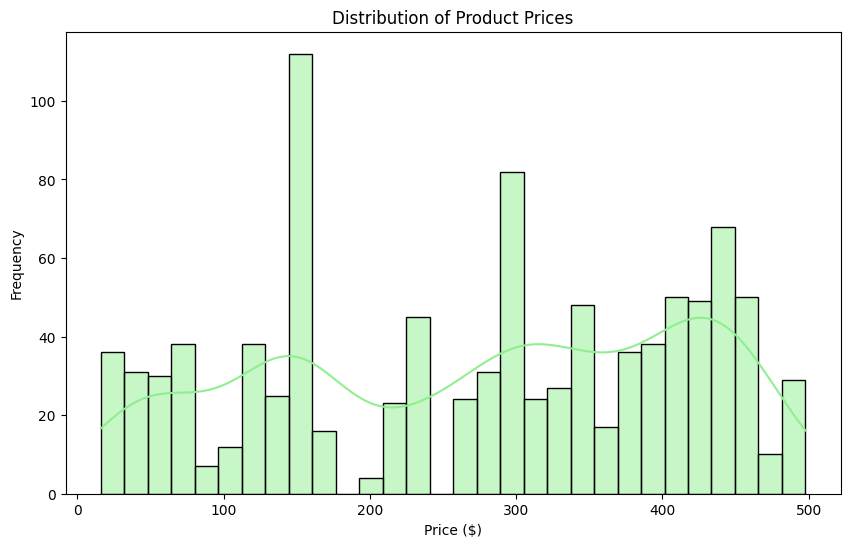

In [29]:
# Distribution of Product Prices
plt.figure(figsize=(10, 6))
sns.histplot(transactions_df['Price'], bins=30, kde=True, color='lightgreen')
plt.title('Distribution of Product Prices')
plt.xlabel('Price ($)')
plt.ylabel('Frequency')
plt.show()

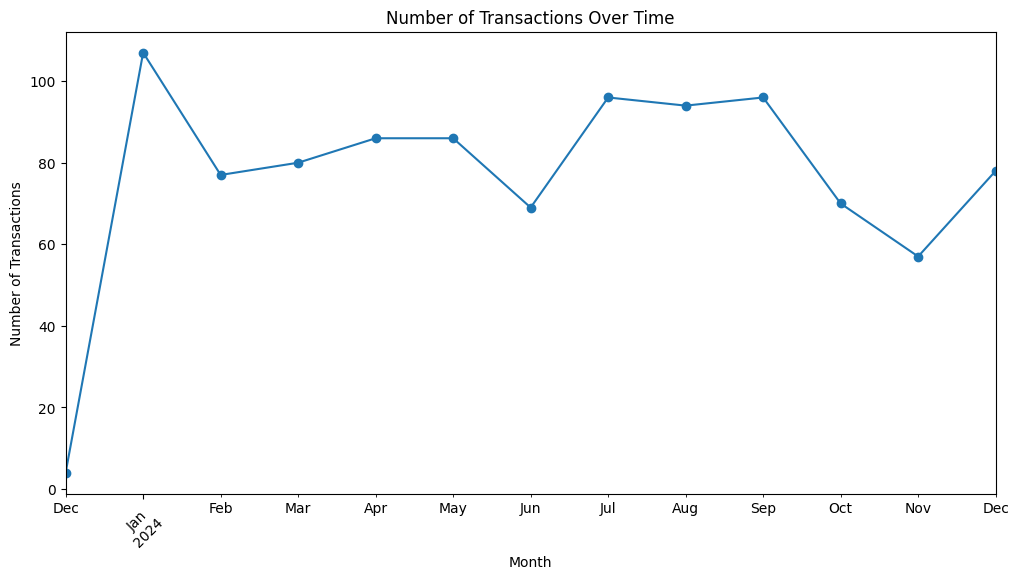

In [30]:
# Number of Transactions Over Time
plt.figure(figsize=(12, 6))
transactions_df['TransactionDate'].dt.to_period('M').value_counts().sort_index().plot(kind='line', marker='o')
plt.title('Number of Transactions Over Time')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Business Insights from the EDA
## Transaction Patterns:
    - Most transactions involve purchasing a small number of items, typically between 1 and 4.
    - This suggests that customers might be making frequent purchases of fewer items, possibly indicating a preference for specific products or a strategy of trying out products before committing to larger purchases.

## Transaction Value and Pricing:
    - The wide range in transaction values and product prices indicates a diverse product offering catering to different customer segments.
    - The average transaction value is relatively high, suggesting that customers are willing to spend significantly per transaction.

## Time Trends:
    - The number of transactions has been consistent over the months, with slight variations.
    - This consistency suggests stable customer engagement and demand throughout the year.

# Recommendations
    - Targeted Marketing: Focus on promoting products that are frequently purchased together to increase the average transaction quantity.
    - Pricing Strategy: Consider offering promotions or discounts on higher-priced items to encourage larger purchases.
    - Customer Engagement: Maintain consistent engagement strategies to ensure stable transaction numbers throughout the year.

# 5. Merge Datasets for Combined Analysis

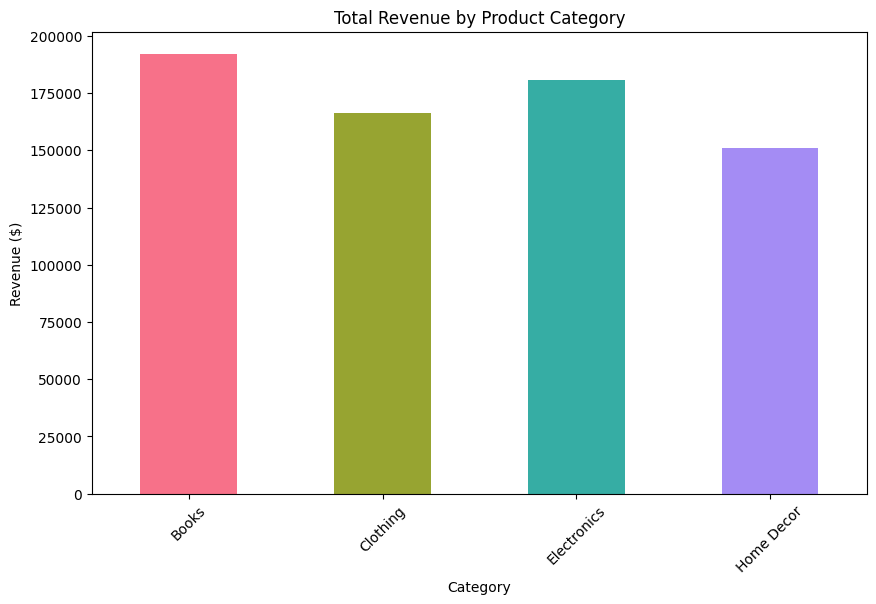

In [33]:
# Merge Transactions with Products to analyze revenue by category
transactions_products = pd.merge(transactions_df, products_df, on='ProductID')

# Total Revenue by Product Category
category_revenue = transactions_products.groupby('Category')['TotalValue'].sum()

# Plot Total Revenue by Product Category with distinct colors
plt.figure(figsize=(10, 6))
category_revenue.plot(kind='bar', color=sns.color_palette('husl', len(category_revenue)))
plt.title('Total Revenue by Product Category')
plt.xlabel('Category')
plt.ylabel('Revenue ($)')
plt.xticks(rotation=45)
plt.show()

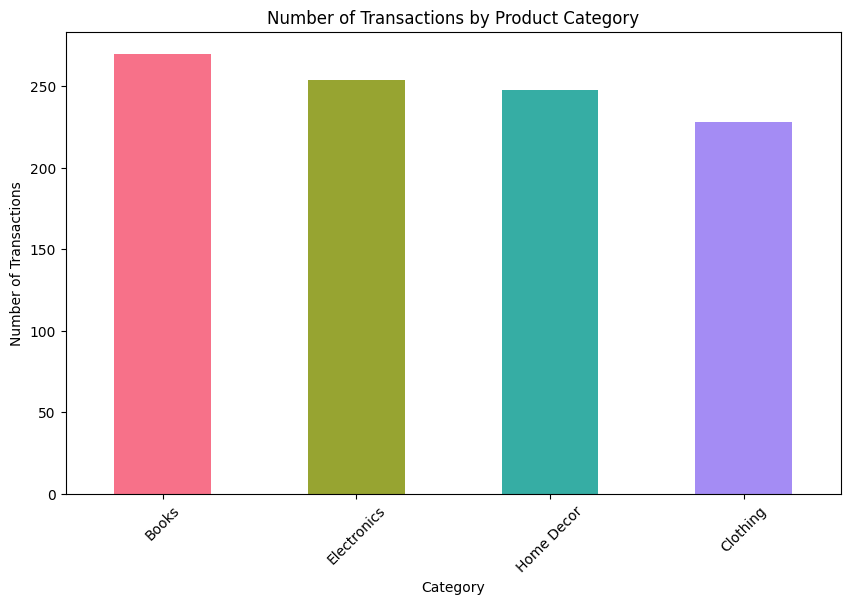

In [34]:
# Additional analysis: Number of Transactions by Product Category
category_transaction_count = transactions_products['Category'].value_counts()

# Plot Number of Transactions by Product Category
plt.figure(figsize=(10, 6))
category_transaction_count.plot(kind='bar', color=sns.color_palette('husl', len(category_transaction_count)))
plt.title('Number of Transactions by Product Category')
plt.xlabel('Category')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.show()

# Summarized Insights:

## Revenue by Product Category
    - High-Revenue Categories: Categories with taller bars generate the most revenue and should be prioritized for marketing and inventory management.
    - Low-Revenue Categories: Lower-performing categories may require targeted promotions to boost sales.

## Number of Transactions by Product Category
    - Transaction Trends: Categories with more transactions indicate high customer engagement.
    - Revenue vs. Transactions: Comparing this plot with the revenue plot identifies:
    - High transaction, low revenue: Consider upselling or bundling strategies.

## High transaction, high revenue: Strong performers to sustain focus.
    - Business Focus: Tailor strategies based on both revenue and transaction volume insights.